# Homework 20

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import utils as utils
from fractions import Fraction
from sklearn.metrics import pairwise_distances

from IPython.display import display, HTML

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

utils.load_custom_styles()

---
## Exercise 4.1

<img src="figures/homework-20/exercise-4.1.png" width="600" />




















---
## Exercise 4.2

<img src="figures/homework-20/exercise-4.2.png" width="600" />




















In [2]:
c1 = np.array([[-1,  0, -0.5, -1.5, -2,  0, -1  ],
               [ 0, -1, -0.5, -1.5,  0, -2, -1.3]])

c2 = np.array([[ 1, 1.3, 0.7, 2.5, 0],
               [ 1, 0.7, 1.3,   1, 1]])

X = np.array([[0, 1, -1,  0.7, -0.2],
              [0, 1,  0, -0.2,  1.5]])

### Nearest Class Centroid classifier

Nearest Class Centroid represents each class $c_k$ with the corresponding mean class vector:

<img src="figures/lecture-19/ncc-class-representation.png" width="600" />


Given the class mean vectors $\mu_1, \mu_2, \cdots, \mu_K$, the new sample $\mathbf{x}_{*}$ is classified to the class $c_k$ corresponding to the
smallest distance:

<img src="figures/lecture-19/ncc-classification-of-new-sample.png" width="600" />





In [3]:
m1 = np.mean(c1, axis=1).reshape(-1, 1)
m2 = np.mean(c2, axis=1).reshape(-1, 1)

In [4]:
m1

array([[-0.85714286],
       [-0.9       ]])

In [5]:
m2

array([[1.1],
       [1. ]])

In [6]:
combined_vectors = np.concatenate([X, m1, m2], axis=1)
combined_vectors

array([[ 0.        ,  1.        , -1.        ,  0.7       , -0.2       ,
        -0.85714286,  1.1       ],
       [ 0.        ,  1.        ,  0.        , -0.2       ,  1.5       ,
        -0.9       ,  1.        ]])

In [7]:
# Compute distances between samples and m_k's
dist = pairwise_distances(combined_vectors.T)

N = X.shape[1]

# Remove the top N rows
dist = np.delete(dist, np.s_[0:N], axis=0)

# Remove the last two columns
dist = np.delete(dist, np.s_[N:N+2], axis=1)

dist

array([[1.24285714, 2.65687403, 0.91126734, 1.70724746, 2.48834016],
       [1.48660687, 0.1       , 2.32594067, 1.26491106, 1.39283883]])

In [8]:
# Classify based on minimum distance
np.argmin(dist, axis=0)+1

array([1, 2, 1, 2, 2])

So the Nearest Centroid Classification is as follows:
\begin{align}
c_1 &= \{ \mathbf{x}_1, \mathbf{x}_3 \} \\
c_2 &= \{ \mathbf{x}_2, \mathbf{x}_4, \mathbf{x}_5  \} \\
\end{align}

### Nearest Neighbour

In [9]:
def compute_min_distances(X, c):
    N = X.shape[1]
    N_c = c.shape[1]
    combined_vectors = np.concatenate([X, c], axis=1)
    dist = pairwise_distances(combined_vectors.T)
    dist = np.delete(dist, np.s_[0:N], axis=0)
    dist = np.delete(dist, np.s_[N:N+N_c], axis=1)
    return np.min(dist, axis=0)

In [10]:
dist_c1 = compute_min_distances(X, c1)
dist_c2 = compute_min_distances(X, c2)
dist = np.concatenate([[dist_c1], [dist_c2]], axis=0)
dist

array([[0.70710678, 2.12132034, 0.        , 1.06301458, 1.7       ],
       [1.        , 0.        , 1.41421356, 1.08166538, 0.53851648]])

In [11]:
# Classify based on minimum distance
np.argmin(dist, axis=0)+1

array([1, 2, 1, 1, 2])

Nearest Neighbour Classification is as follows:
\begin{align}
c_1 &= \{ \mathbf{x}_1, \mathbf{x}_3, \mathbf{x}_4  \} \\
c_2 &= \{ \mathbf{x}_2,  \mathbf{x}_5  \} \\
\end{align}

---
## Exercise 4.3

<img src="figures/homework-20/exercise-4.3.png" width="600" />









Calculate the data projections in the 1-dimensional feature space determined by
applying Fisher Discriminant Analysis.










In [12]:
c1 = np.array([[-1,  0, -0.5, -1.5, -2,  0, -1  ],
               [ 0, -1, -0.5, -1.5,  0, -2, -1.3]])
c2 = np.array([[ 1, 1.3, 0.7, 2.5, 0],
               [ 1, 0.7, 1.3,   1, 1]])

The within-class scatter matrix $\mathbf{S}_w$ can be computed as follows:

<img src="figures/lecture-19/within-scatter-matrix-formula.png" width="600" />





In [13]:
m1 = np.mean(c1, axis=1).reshape(-1, 1)
m2 = np.mean(c2, axis=1).reshape(-1, 1)

In [14]:
S1 = np.dot((c1 - m1), (c1 - m1).T)
S2 = np.dot((c2 - m2), (c2 - m2).T)
Sw = S1 + S2
Sw

array([[ 6.73714286, -1.78      ],
       [-1.78      ,  3.7       ]])

Next, we compute the between-class scatter matrix $\mathbf{S}_b$ is a $D\times D$ :

<img src="figures/lecture-19/eq.4.15-between-class-scatter.png" width="600" />



In [15]:
Sb = np.dot(m1 - m2, (m1 - m2).T)
Sb

array([[3.83040816, 3.71857143],
       [3.71857143, 3.61      ]])

Now, we can perform eigenanalysis on $\mathbf{S} = \mathbf{S}_{w}^{-1}\mathbf{S}_{b}$ and pick the eigenvector corresponding to the maximal eigenvalue:

<img src="figures/lecture-19/fisher-ratio-solution-2a.png" width="600" />





In [16]:
S_inv = np.linalg.inv(Sw)
S = np.dot(S_inv, Sb)
eigvals, eigvec = np.linalg.eig(S)
maximal_eigval_idx = np.argmax(eigvals)
w = eigvec[:,maximal_eigval_idx]
w

array([-0.54638477, -0.83753429])

Finally, we perform the projection:

$$
y_i = \mathbf{w}^T \mathbf{x}_i
$$

In [17]:
np.dot(w.T, np.concatenate([c1, c2], axis=1))

array([ 0.54638477,  0.83753429,  0.69195953,  2.07587859,  1.09276954,
        1.67506858,  1.63517934, -1.38391906, -1.2965742 , -1.47126391,
       -2.20349621, -0.83753429])

---
### Alternative computation of w

The optimal projection vector $\mathbf{w}$ can be computed as follows:

<img src="figures/lecture-19/fisher-ratio-solution-2b.png" width="600" />





In [18]:
w_alt = np.dot(np.linalg.inv(Sw), m1-m2)
w_alt = w_alt.reshape(-1)
w_alt

array([-0.48823083, -0.74839213])

Compute the unit vector:

In [19]:
w_alt / np.linalg.norm(w_alt)

array([-0.54638477, -0.83753429])

----
### Visualisation

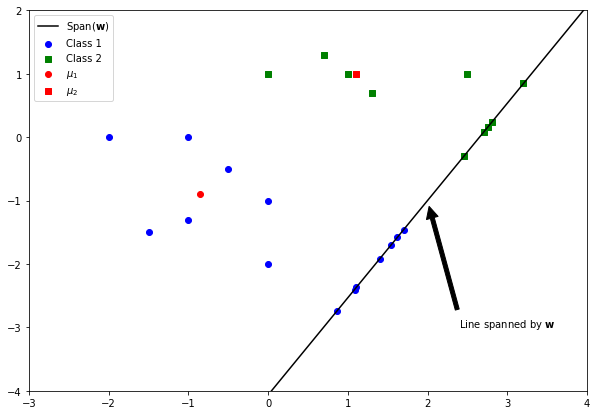

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(c1[0], c1[1], color='b', marker='o', label='Class 1')
ax.scatter(c2[0], c2[1], color='g', marker='s', label='Class 2')
ax.scatter(m1[0], m1[1], color='r', marker='o', label='$\mu_1$')
ax.scatter(m2[0], m2[1], color='r', marker='s', label='$\mu_2$')

w_origin = [2, -1]

w_coords = np.arange(-5, 5, 0.1)
x1_coords = w_coords * w[0] + w_origin[0]
x2_coords = w_coords * w[1] + w_origin[1]
ax.plot(x1_coords, x2_coords, color='black', label='Span($\mathbf{w}$)')

c1_projections = np.dot(w.T, c1)
c1_x1_coords = c1_projections * w[0] + w_origin[0]
c1_x2_coords = c1_projections * w[1] + w_origin[1]
ax.scatter(c1_x1_coords, c1_x2_coords, color='b', marker='o')


c2_projections = np.dot(w.T, c2)
c2_x1_coords = c2_projections * w[0] + w_origin[0]
c2_x2_coords = c2_projections * w[1] + w_origin[1]
ax.scatter(c2_x1_coords, c2_x2_coords, color='g', marker='s')


#ax.arrow(w_origin[0]+0.2, w_origin[1], w[0], w[1], color='purple', head_width=0.1, head_length=0.2)

ax.annotate('Line spanned by $\mathbf{w}$', xy=(2, -1), xytext=(2.4, -3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_xlim((-3, 4))
ax.set_ylim((-4, 2))

ax.legend();

---
## Exercise 4.4

<img src="figures/homework-20/exercise-4.4a.png" width="600" />




















<img src="figures/homework-20/exercise-4.4b.png" width="600" />


















